## Informasi Mahasiswa

Nama: Marlina

NPM : 2108107010009

## Jenis Dataset

Dataset dari kaggle https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset


informasi variabel
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## studi kasus klasifikasi
membangun model prediksi diagnosa diabetes untuk pasien perempuan dengan beberapa kondisi seperti jumlah kehamilan, tingkat glukosa, BMI, dan Umur pasien.

## Import Libary dan Baca dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
breastcancer = pd.read_csv('dataset/breast-cancer.csv')
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocessing Data

In [3]:
# Check dataset information
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Check descriptive statistics of the dataset
breastcancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Check missing values
print(breastcancer.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Check for duplicate values
print(breastcancer.duplicated().sum())

0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'diagnosis' column where 1 represents 'Malignant' and 0 represents 'Benign'
label_encoder = LabelEncoder()
breastcancer['diagnosis'] = label_encoder.fit_transform(breastcancer['diagnosis'])

In [8]:
# Display the first five rows of the dataset
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Check class distribution in the dataset
print(breastcancer['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [10]:
# Select numerical columns
num_cols = breastcancer.select_dtypes(include='number').columns

# Select categorical columns
cat_cols = breastcancer.select_dtypes(include='object').columns

<Axes: >

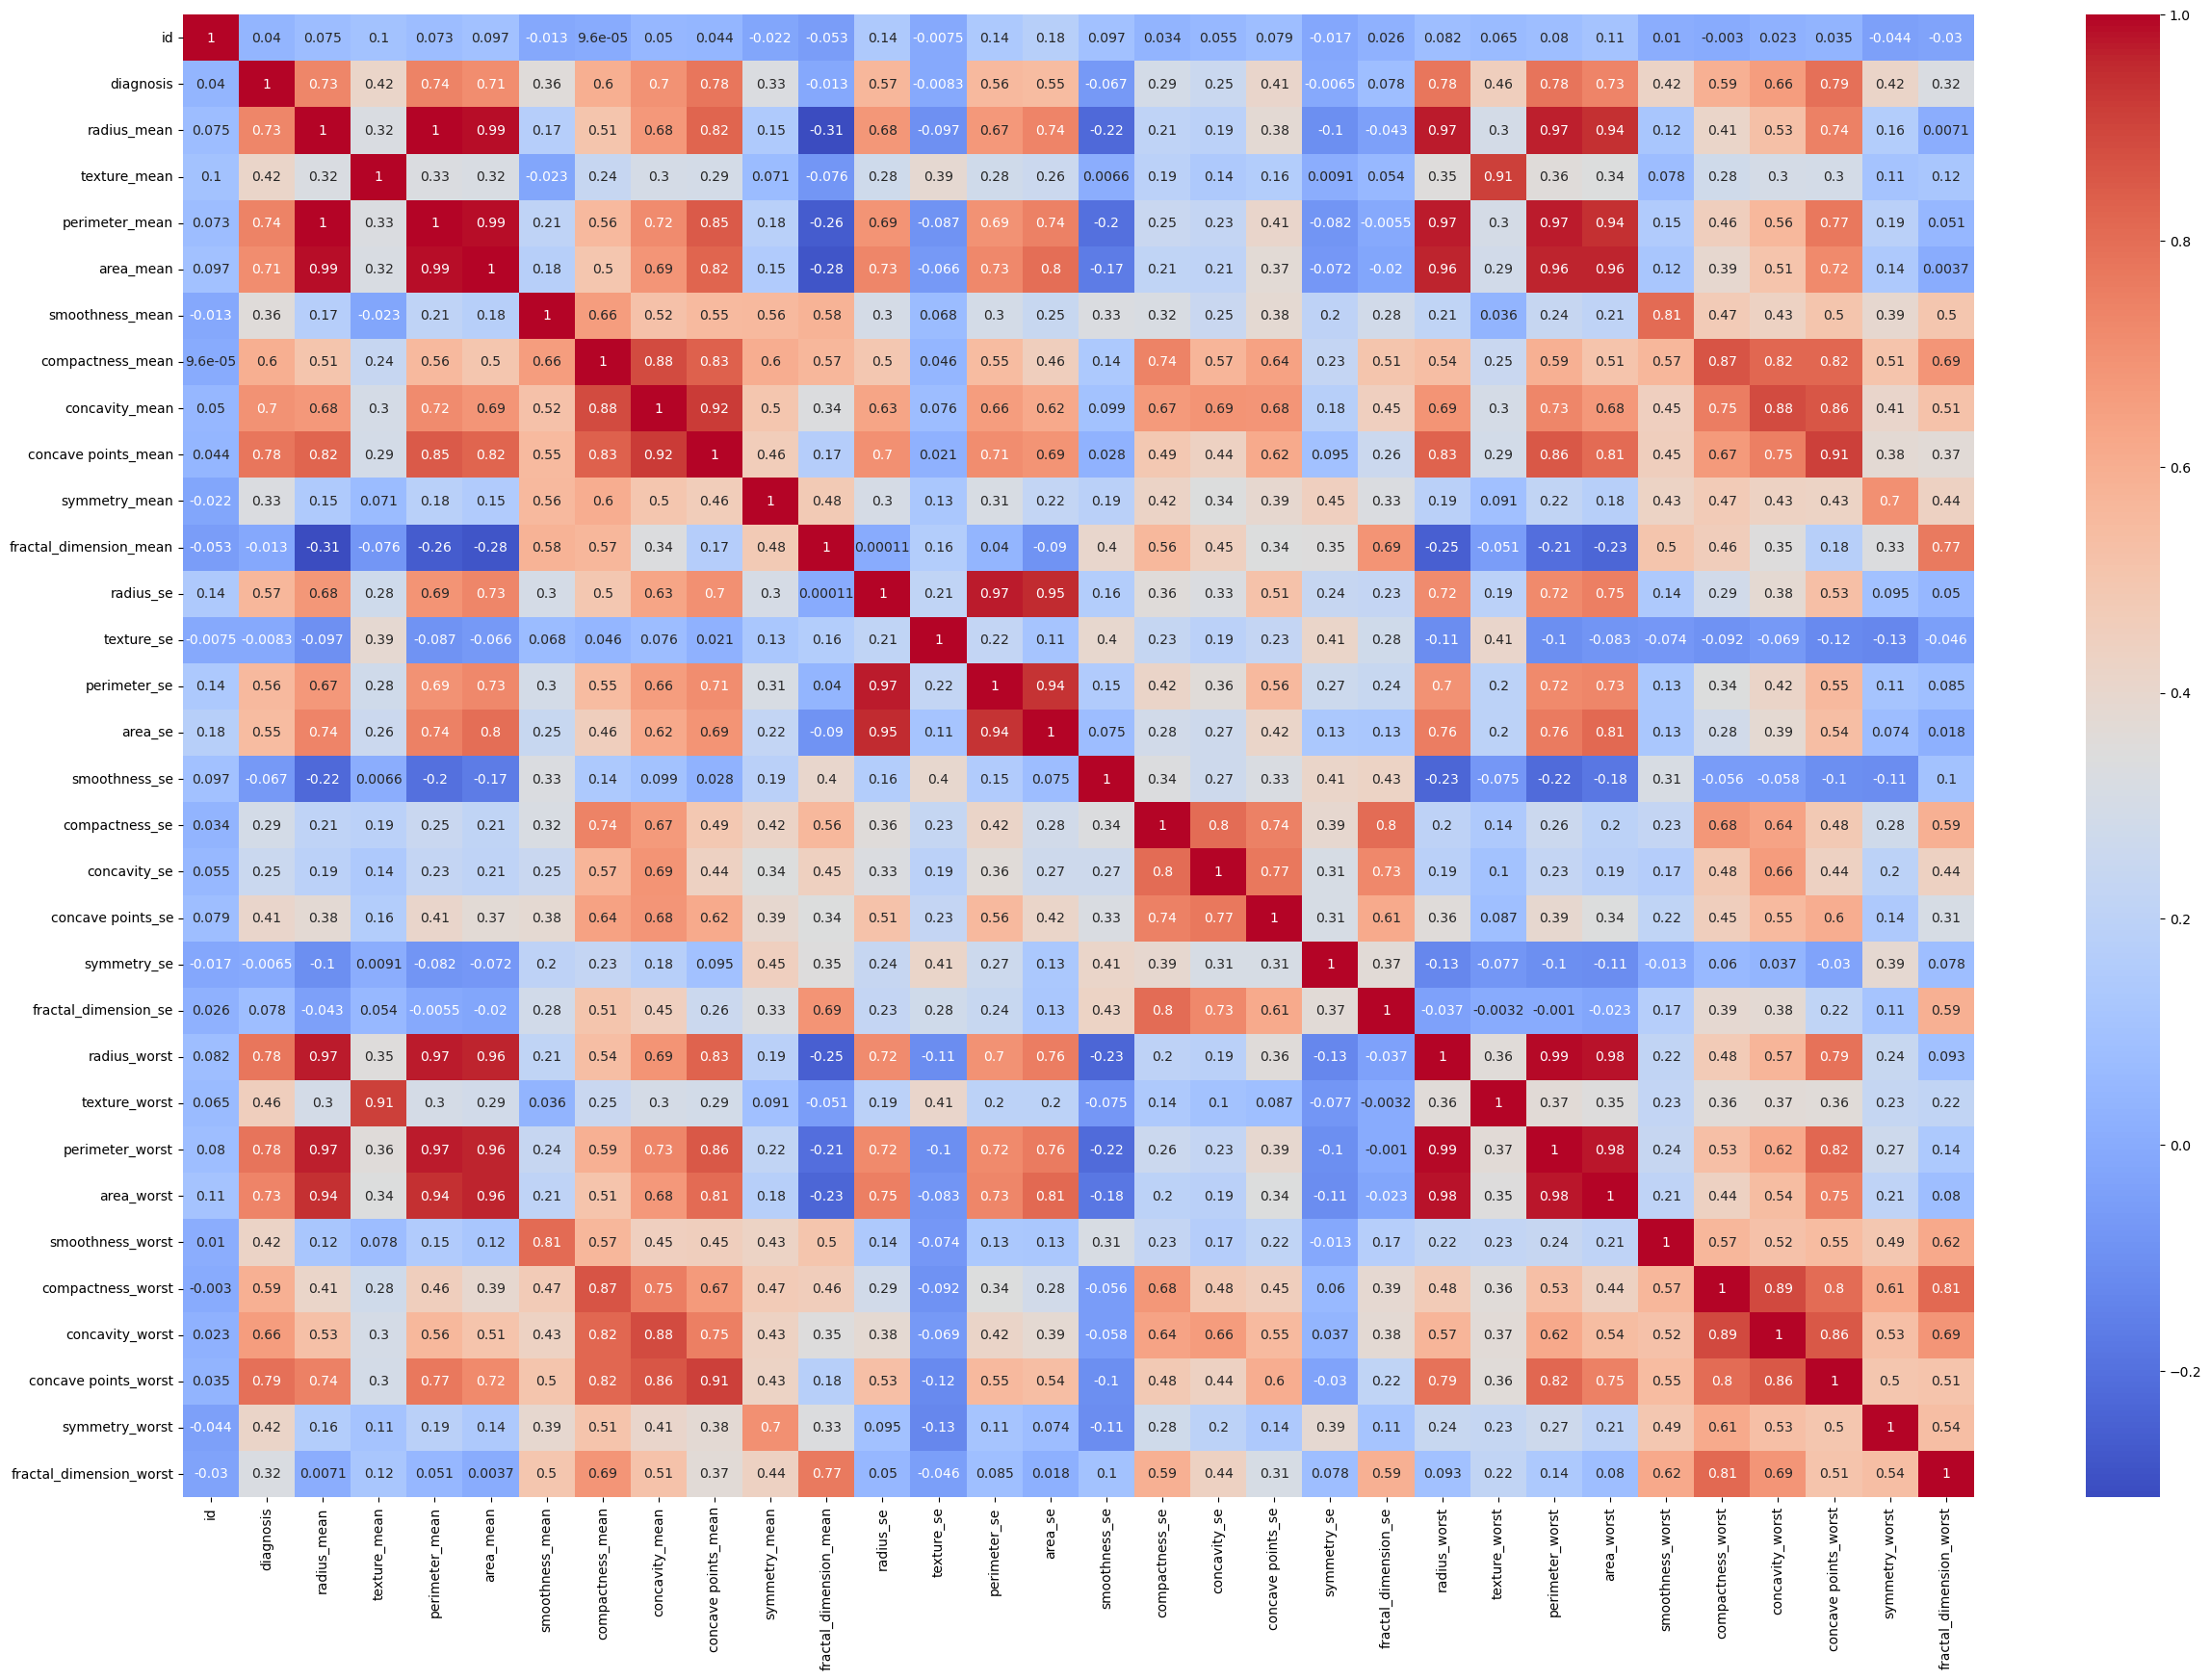

In [11]:
# Calculate correlation matrix
corr = breastcancer[num_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [12]:
# Display column names
breastcancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

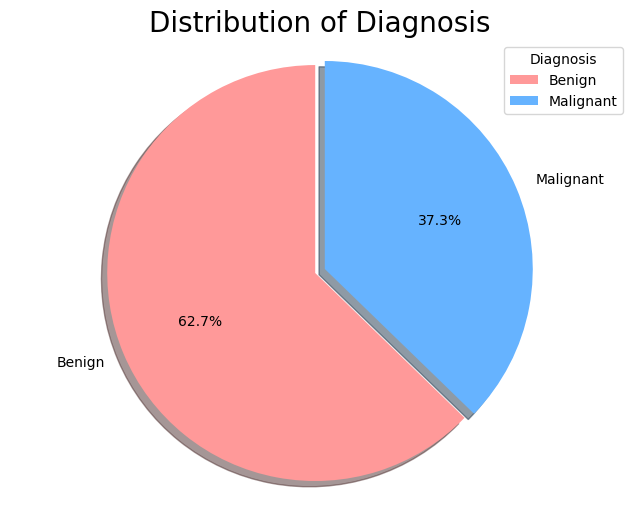

In [13]:
# Visualize distribution of the 'diagnosis' variable
plt.figure(figsize=(8,6))

# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff']

# Create a pie chart
r = breastcancer['diagnosis'].value_counts().values
label = ['Benign', 'Malignant']
explode = (0, 0.05)  # Slightly explode the 'Malignant' slice for emphasis
plt.pie(r, labels=label, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Distribution of Diagnosis', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='Diagnosis', loc='upper right')
plt.show()


Diagram lingkaran memvisualisasikan distribusi variabel 'diagnosis' dalam kumpulan data kanker payudara.

- Benign (jinak): Menunjukkan tumor yang bersifat non-kanker.
- Malignant (ganas): Menunjukkan tumor yang bersifat kanker.

Kasus 'jinak' mewakili porsi data yang lebih besar dibandingkan dengan kasus 'ganas'.
Sekitar 62,7% kasus diklasifikasikan sebagai 'jinak', sedangkan 37,3% sisanya diklasifikasikan sebagai 'ganas'.

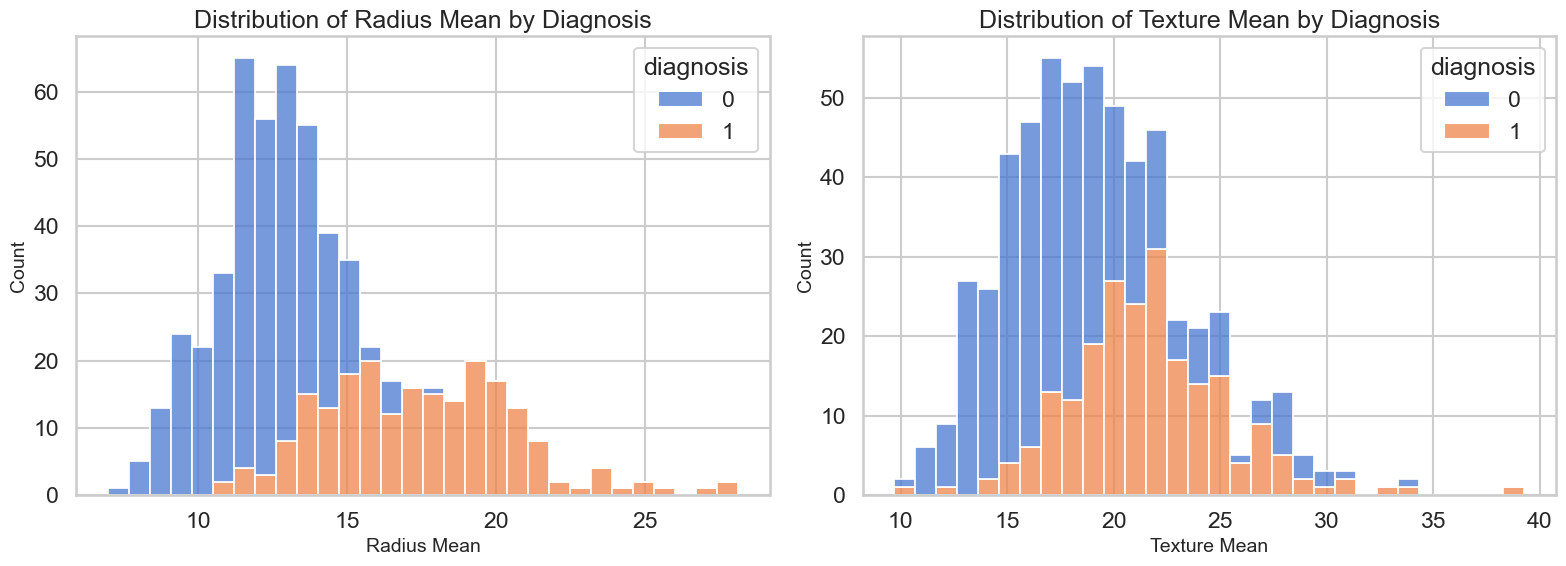

In [14]:
# Set the style and context for the plots
sns.set_style('whitegrid')
sns.set_context('talk')

# Create subplots with a larger figure size
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram plot for variable 'radius_mean'
sns.histplot(x='radius_mean', data=breastcancer, hue='diagnosis', ax=ax[0], bins=30, multiple="stack", palette='muted')
ax[0].set_title('Distribution of Radius Mean by Diagnosis', fontsize=18)
ax[0].set_xlabel('Radius Mean', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Histogram plot for variable 'texture_mean'
sns.histplot(x='texture_mean', data=breastcancer, hue='diagnosis', bins=30, ax=ax[1], multiple="stack", palette='muted')
ax[1].set_title('Distribution of Texture Mean by Diagnosis', fontsize=18)
ax[1].set_xlabel('Texture Mean', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

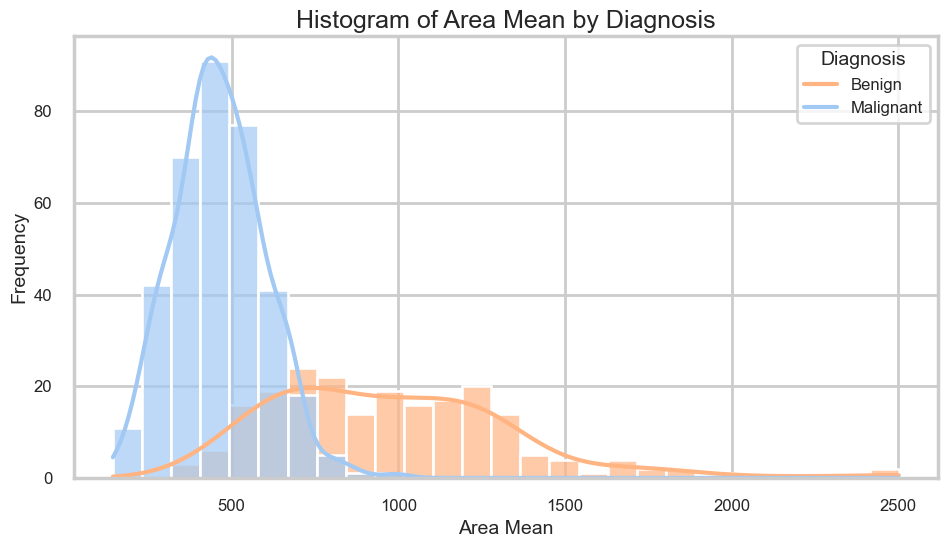

In [15]:
# Set the style and context for the plot
sns.set_style('whitegrid')
sns.set_context('poster')

# Create the histogram plot
plt.figure(figsize=(10, 6))  # Adjusted figure size
sns.histplot(data=breastcancer, x='area_mean', hue='diagnosis', kde=True, palette='pastel', alpha=0.7)

# Add title and labels
plt.title('Histogram of Area Mean by Diagnosis', fontsize=18, loc='center')
plt.xlabel('Area Mean', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend with custom labels
plt.legend(title='Diagnosis', fontsize=12, title_fontsize=14, labels=['Benign', 'Malignant'])

# Adjust the font size of both x-axis and y-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Histogram menunjukkan distribusi frekuensi 'area_mean' untuk kedua kategori diagnosis ('Benign' dan 'Malignant'). Kita dapat melihat bahwa distribusi 'area_mean' untuk tumor ganas (Malignant) cenderung memiliki nilai yang lebih tinggi dibandingkan dengan tumor jinak (Benign). Hal ini menunjukkan bahwa 'area_mean' yang lebih besar mungkin menjadi karakteristik tumor ganas.

C:\Users\Asus\AppData\Local\Temp\ipykernel_20836\4290195972.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


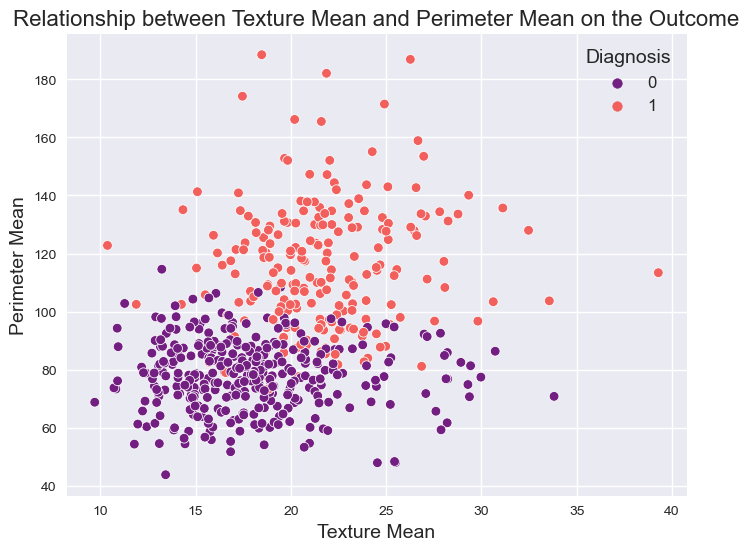

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya plot
plt.style.use('seaborn')

# Mengatur warna grid menjadi dark
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))  # Mengubah ukuran plot menjadi (8, 6)
sns.scatterplot(x='texture_mean', y='perimeter_mean', data=breastcancer, hue='diagnosis', palette='magma')
plt.title('Relationship between Texture Mean and Perimeter Mean on the Outcome', fontsize=14, loc='center')  # Mengurangi ukuran font judul
plt.xlabel('Texture Mean', fontsize=10)  # Mengurangi ukuran font label sumbu x
plt.ylabel('Perimeter Mean', fontsize=10)  # Mengurangi ukuran font label sumbu y
plt.legend(title='Diagnosis', fontsize=8, title_fontsize=12)  # Mengurangi ukuran font legenda
plt.show()


## Split dataset dan normalisasi data

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = breastcancer[['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
y = breastcancer['diagnosis']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
X

,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,10.38,122.80,1001.0,0.11840
1,17.77,132.90,1326.0,0.08474
2,21.25,130.00,1203.0,0.10960
3,20.38,77.58,386.1,0.14250
4,14.34,135.10,1297.0,0.10030
...,...,...,...,...
564,22.39,142.00,1479.0,0.11100
565,28.25,131.20,1261.0,0.09780
566,28.08,108.30,858.1,0.08455
567,29.33,140.10,1265.0,0.11780


## Membangun Model 

In [19]:
# Import the support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a support vector classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(svc, classification_report(y_test, y_pred)))

Classification report for - 
SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114




hasil prediksi model SVC dengan kernel linear untuk semua atribut yang dipilih mempunyai skor akurasi 94%

In [20]:
# model linear SVM dengan variabel texture_mean dan perimeter_mean
svm_tp = SVC(kernel='linear', random_state=10)
svm_tp.fit(X_train[:, [0, 1]], y_train)

SVC(kernel='linear', random_state=10)

In [21]:
# model testing texture_mean dan perimeter_mean
y_pred_tp =svm_tp.predict(X_test[:, [0, 1]])
print("Classification Report:")
print(classification_report(y_test, y_pred_tp))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



hasil prediksi model dengan texture_mean dan perimeter_mean sebagai variabel input berhasil 90%

In [22]:
# membangun model SVM dengan kernel rbf dan variabel texture_mean dan perimeter_mean
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X_train[:, [0, 1]], y_train)


SVC(C=10, gamma=1)

In [23]:
# Model testing and prediction
y_pred_rbf = svm_rbf.predict(X_test[:, [0, 1]])  
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



hasil prediksi dengan model svm kernel rbf adalah 91%

In [24]:
# model training texture_mean area_mean
svm_texture_area = SVC( kernel='linear',random_state=10)
svm_texture_area.fit(X_train[:, [0, 2]], y_train)

SVC(kernel='linear', random_state=10)

In [25]:
# model testing glucose age
y_pred_area =svm_texture_area.predict(X_test[:, [0, 2]])
print("Classification Report:")
print(classification_report(y_test, y_pred_area))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        71
           1       0.90      0.81      0.85        43

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



## Visualisasi Model 

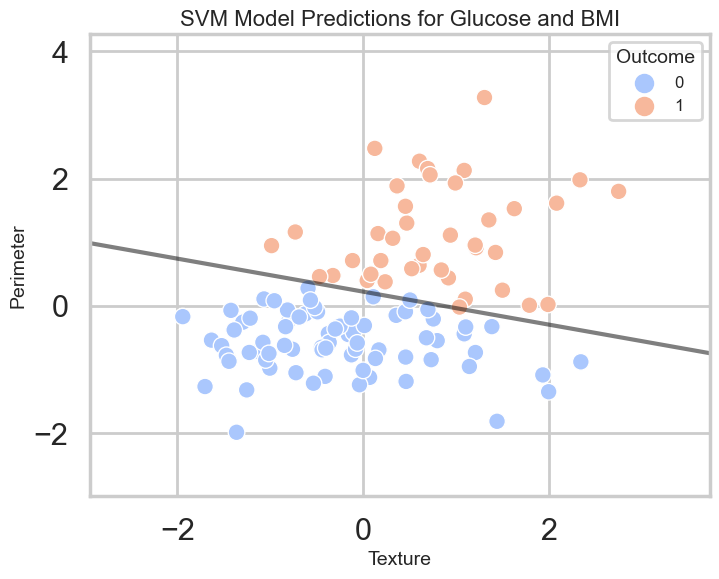

In [26]:
# Plot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_tp, palette='coolwarm')
plt.xlabel('Texture', fontsize=14)
plt.ylabel('Perimeter', fontsize=14)
plt.title('SVM Model Predictions for Glucose and BMI', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_tp.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


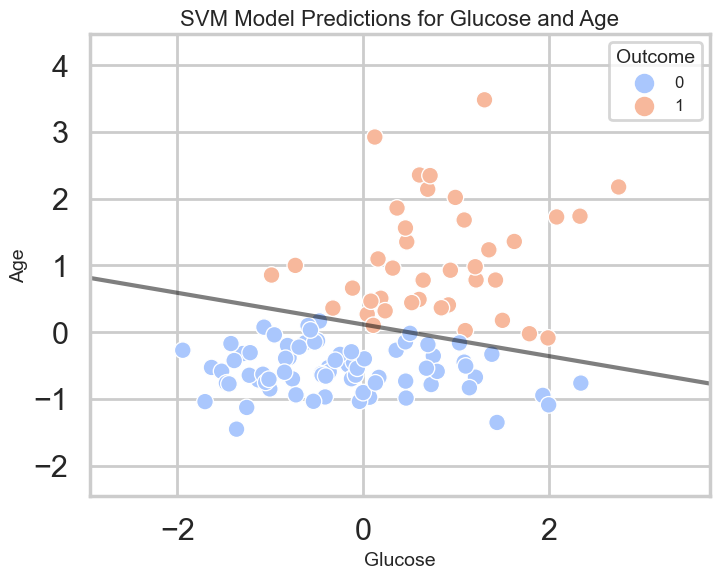

In [27]:
# Plot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 2], hue=y_pred_area, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('SVM Model Predictions for Glucose and Age', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 2].min() - 1, X_test[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_texture_area.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


#### plot terbaik dengan model rbf

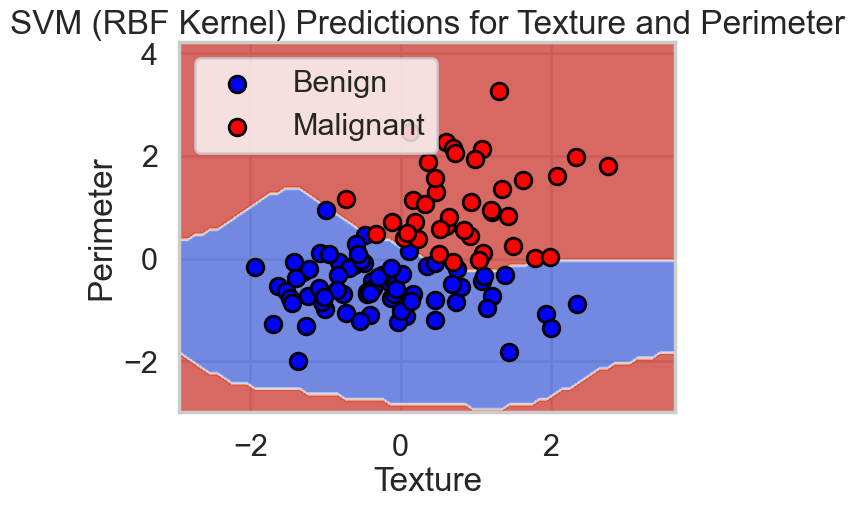

In [28]:
# Define the meshgrid range
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot with a colorful palette
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot the scatter plot with specified labels and colors
plt.scatter(X_test[y_pred_rbf == 0, 0], X_test[y_pred_rbf == 0, 1], c='blue', label='Benign', edgecolors='k')
plt.scatter(X_test[y_pred_rbf == 1, 0], X_test[y_pred_rbf == 1, 1], c='red', label='Malignant', edgecolors='k')

plt.xlabel('Texture')
plt.ylabel('Perimeter')
plt.title('SVM (RBF Kernel) Predictions for Texture and Perimeter')

# Add legend
plt.legend()

plt.show()


plot for glucose vs bmi with decision boundary dengan rbf SVM model berhasil memisahkan kelas dengan diagnosa benign dan malignant

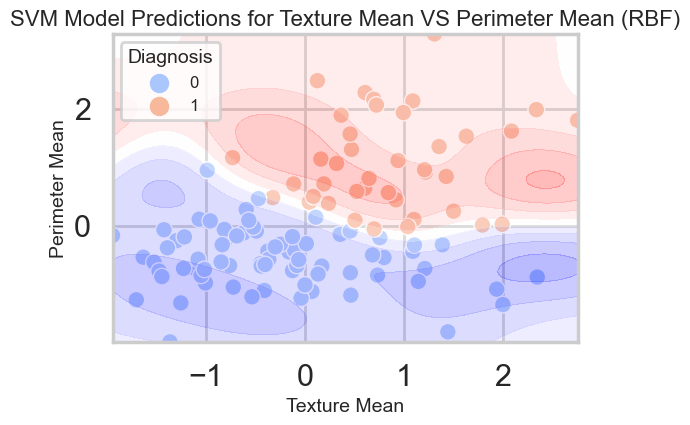

In [29]:
# Plotting the decision boundary
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_rbf, palette='coolwarm')
plt.xlabel('Texture Mean', fontsize=14)
plt.ylabel('Perimeter Mean', fontsize=14)
plt.title('SVM Model Predictions for Texture Mean VS Perimeter Mean (RBF)', fontsize=16)
plt.legend(title='Diagnosis', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_points = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_points = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
X1, X2 = np.meshgrid(x_points, y_points)
Z = svm_rbf.decision_function(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, cmap='bwr', alpha=0.3) 
plt.show()


## mencoba hyperparameter tuning
mencoba membuat parameter tuning untuk model svm

In [30]:
# hyperparameter
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
              'kernel': ['rbf', 'linear'],
              }

model1 = SVC()
# Create a GridSearchCV object
grid = GridSearchCV(model1, param_grid,cv=5, refit=True, verbose=3)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# best hyperparameters
grid.best_params_

# best model
best_poly_svr = grid.best_estimator_

# Predict using the best model
y_pred = best_poly_svr.predict(X_test)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.934 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.5, kernel=rbf

In [31]:
print(grid.best_params_)
# Classification report
print(classification_report(y_test, y_pred))

{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



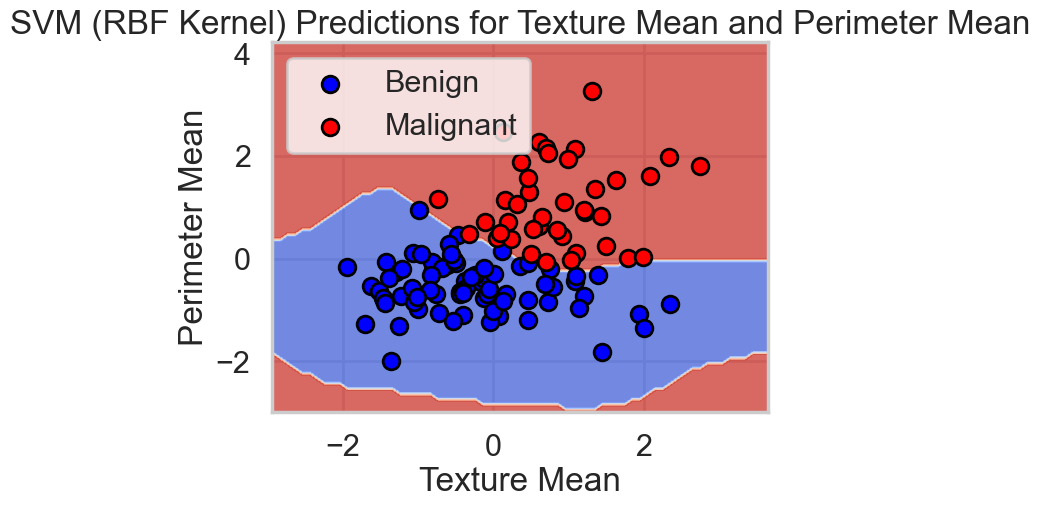

In [32]:
# Define the meshgrid range
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot with a colorful palette
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot the scatter plot with specified labels
plt.scatter(X_test[y_pred_rbf == 0, 0], X_test[y_pred_rbf == 0, 1], c='blue', label='Benign', edgecolors='k')
plt.scatter(X_test[y_pred_rbf == 1, 0], X_test[y_pred_rbf == 1, 1], c='red', label='Malignant', edgecolors='k')

plt.xlabel('Texture Mean')
plt.ylabel('Perimeter Mean')
plt.title('SVM (RBF Kernel) Predictions for Texture Mean and Perimeter Mean')

# Add legend
plt.legend()

plt.show()
